In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
test = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv")

In [3]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
train.shape


(103904, 25)

In [5]:
test.shape

(25976, 25)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [7]:
train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [8]:
test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [9]:
train.dropna(inplace=True)

In [10]:
test.dropna(inplace=True)

In [11]:
def dropds(dset):
    dset.drop(["Unnamed: 0","id"],axis=1,inplace=True)
    dset["Gender"] = dset["Gender"].map({"Male":1,"Female":0})
    dset["Customer Type"] = dset["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})
    #travel_dum = pd.get_dummies(dset[["Type of Travel"]],drop_first=True)
    #class_dum = pd.get_dummies(dset[["Class"]],drop_first=True)


In [12]:
dropds(train)
dropds(test)

In [13]:
train.shape

(103594, 23)

In [14]:
test.shape

(25893, 23)

In [15]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,0,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,1,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,0,1,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,1,1,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int64  
 1   Customer Type                      103594 non-null  int64  
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  int64  
 1   Customer Type                      25893 non-null  int64  
 2   Age                                25893 non-null  int64  
 3   Type of Travel                     25893 non-null  object 
 4   Class                              25893 non-null  object 
 5   Flight Distance                    25893 non-null  int64  
 6   Inflight wifi service              25893 non-null  int64  
 7   Departure/Arrival time convenient  25893 non-null  int64  
 8   Ease of Online booking             25893 non-null  int64  
 9   Gate location                      25893 non-null  int64  
 10  Food and drink                     25893 non-null  int64  
 11  Online boarding                    25893 non-null  int

In [18]:
travel_dum = pd.get_dummies(train[["Type of Travel"]],drop_first=True)
class_dum = pd.get_dummies(train[["Class"]],drop_first=True)
train = pd.concat([train,travel_dum,class_dum],axis=1)

In [19]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,1,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,4,5,5,25,18.0,neutral or dissatisfied,1,0,1
1,1,0,25,Business travel,Business,235,3,2,3,3,...,3,1,4,1,1,6.0,neutral or dissatisfied,0,0,0
2,0,1,26,Business travel,Business,1142,2,2,2,2,...,4,4,4,5,0,0.0,satisfied,0,0,0
3,0,1,25,Business travel,Business,562,2,5,5,5,...,3,1,4,2,11,9.0,neutral or dissatisfied,0,0,0
4,1,1,61,Business travel,Business,214,3,3,3,3,...,4,3,3,3,0,0.0,satisfied,0,0,0


In [20]:
travel_dum = pd.get_dummies(test[["Type of Travel"]],drop_first=True)
class_dum = pd.get_dummies(test[["Class"]],drop_first=True)
test = pd.concat([test,travel_dum,class_dum],axis=1)

In [21]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0,1,52,Business travel,Eco,160,5,4,3,4,...,5,2,5,5,50,44.0,satisfied,0,1,0
1,0,1,36,Business travel,Business,2863,1,1,3,1,...,4,3,4,5,0,0.0,satisfied,0,0,0
2,1,0,20,Business travel,Eco,192,2,0,2,4,...,3,2,2,2,0,0.0,neutral or dissatisfied,0,1,0
3,1,1,44,Business travel,Business,3377,0,0,0,2,...,1,3,1,4,0,6.0,satisfied,0,0,0
4,0,1,49,Business travel,Eco,1182,2,3,4,3,...,2,4,2,4,0,20.0,satisfied,0,1,0


In [22]:
train.drop(["Type of Travel","Class"],axis=1,inplace=True)

In [23]:
test.drop(["Type of Travel","Class"],axis=1,inplace=True)

In [24]:
train.head()

,Gender,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,1,13,460,3,4,3,1,5,3,...,4,4,5,5,25,18.0,neutral or dissatisfied,1,0,1
1,1,0,25,235,3,2,3,3,1,3,...,3,1,4,1,1,6.0,neutral or dissatisfied,0,0,0
2,0,1,26,1142,2,2,2,2,5,5,...,4,4,4,5,0,0.0,satisfied,0,0,0
3,0,1,25,562,2,5,5,5,2,2,...,3,1,4,2,11,9.0,neutral or dissatisfied,0,0,0
4,1,1,61,214,3,3,3,3,4,5,...,4,3,3,3,0,0.0,satisfied,0,0,0


In [25]:
test.head()

,Gender,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0,1,52,160,5,4,3,4,3,4,...,5,2,5,5,50,44.0,satisfied,0,1,0
1,0,1,36,2863,1,1,3,1,5,4,...,4,3,4,5,0,0.0,satisfied,0,0,0
2,1,0,20,192,2,0,2,4,2,2,...,3,2,2,2,0,0.0,neutral or dissatisfied,0,1,0
3,1,1,44,3377,0,0,0,2,3,4,...,1,3,1,4,0,6.0,satisfied,0,0,0
4,0,1,49,1182,2,3,4,3,4,1,...,2,4,2,4,0,20.0,satisfied,0,1,0


In [26]:
train["satisfaction"] = train["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})
test["satisfaction"] = test["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})

In [27]:
train.head()

,Gender,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,1,13,460,3,4,3,1,5,3,...,4,4,5,5,25,18.0,0,1,0,1
1,1,0,25,235,3,2,3,3,1,3,...,3,1,4,1,1,6.0,0,0,0,0
2,0,1,26,1142,2,2,2,2,5,5,...,4,4,4,5,0,0.0,1,0,0,0
3,0,1,25,562,2,5,5,5,2,2,...,3,1,4,2,11,9.0,0,0,0,0
4,1,1,61,214,3,3,3,3,4,5,...,4,3,3,3,0,0.0,1,0,0,0


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int64  
 1   Customer Type                      103594 non-null  int64  
 2   Age                                103594 non-null  int64  
 3   Flight Distance                    103594 non-null  int64  
 4   Inflight wifi service              103594 non-null  int64  
 5   Departure/Arrival time convenient  103594 non-null  int64  
 6   Ease of Online booking             103594 non-null  int64  
 7   Gate location                      103594 non-null  int64  
 8   Food and drink                     103594 non-null  int64  
 9   Online boarding                    103594 non-null  int64  
 10  Seat comfort                       103594 non-null  int64  
 11  Inflight entertainment             1035

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt 


In [30]:
plt.figure(figsize=(20,20))
#sns.pairplot(train)

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:xlabel='Online boarding', ylabel='count'>

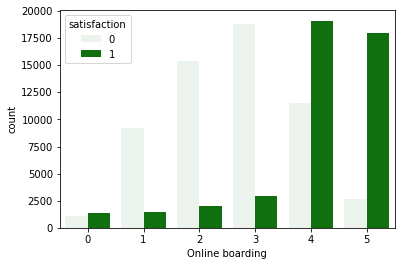

In [31]:
sns.countplot(x='Online boarding',hue="satisfaction",data=train,color="green")

<AxesSubplot:xlabel='Age', ylabel='Count'>

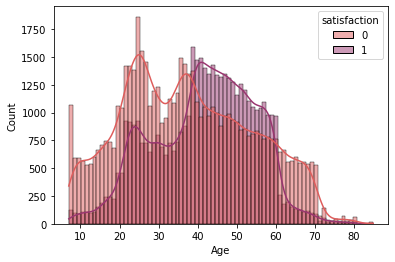

In [32]:
sns.histplot(x='Age',hue="satisfaction",data=train,kde=True,palette="flare")

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

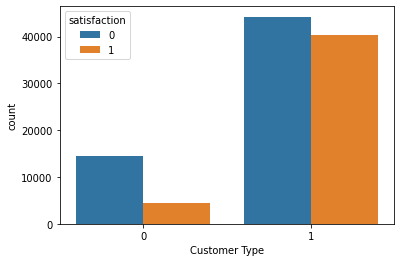

In [33]:
sns.countplot(x='Customer Type',hue="satisfaction",data=train)

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

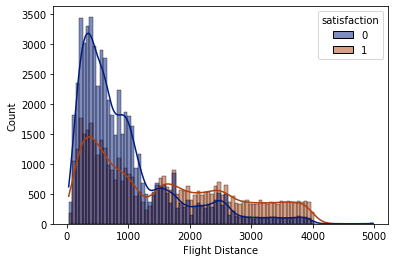

In [34]:
sns.histplot(x='Flight Distance',hue="satisfaction",data=train,kde=True,palette="dark")

<AxesSubplot:xlabel='Inflight wifi service', ylabel='count'>

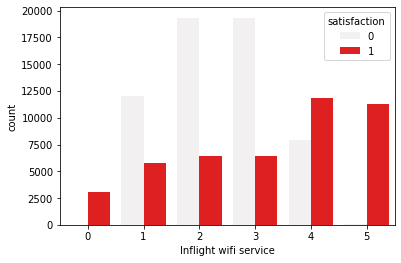

In [35]:
sns.countplot(x='Inflight wifi service',hue="satisfaction",data=train,color="red")

<AxesSubplot:xlabel='Food and drink', ylabel='count'>

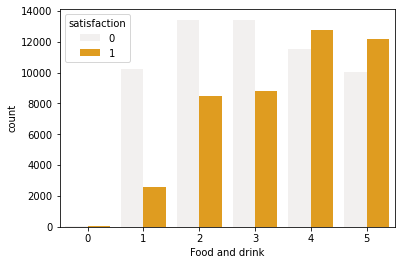

In [36]:
sns.countplot(x='Food and drink',hue="satisfaction",data=train,color="orange")

<AxesSubplot:>

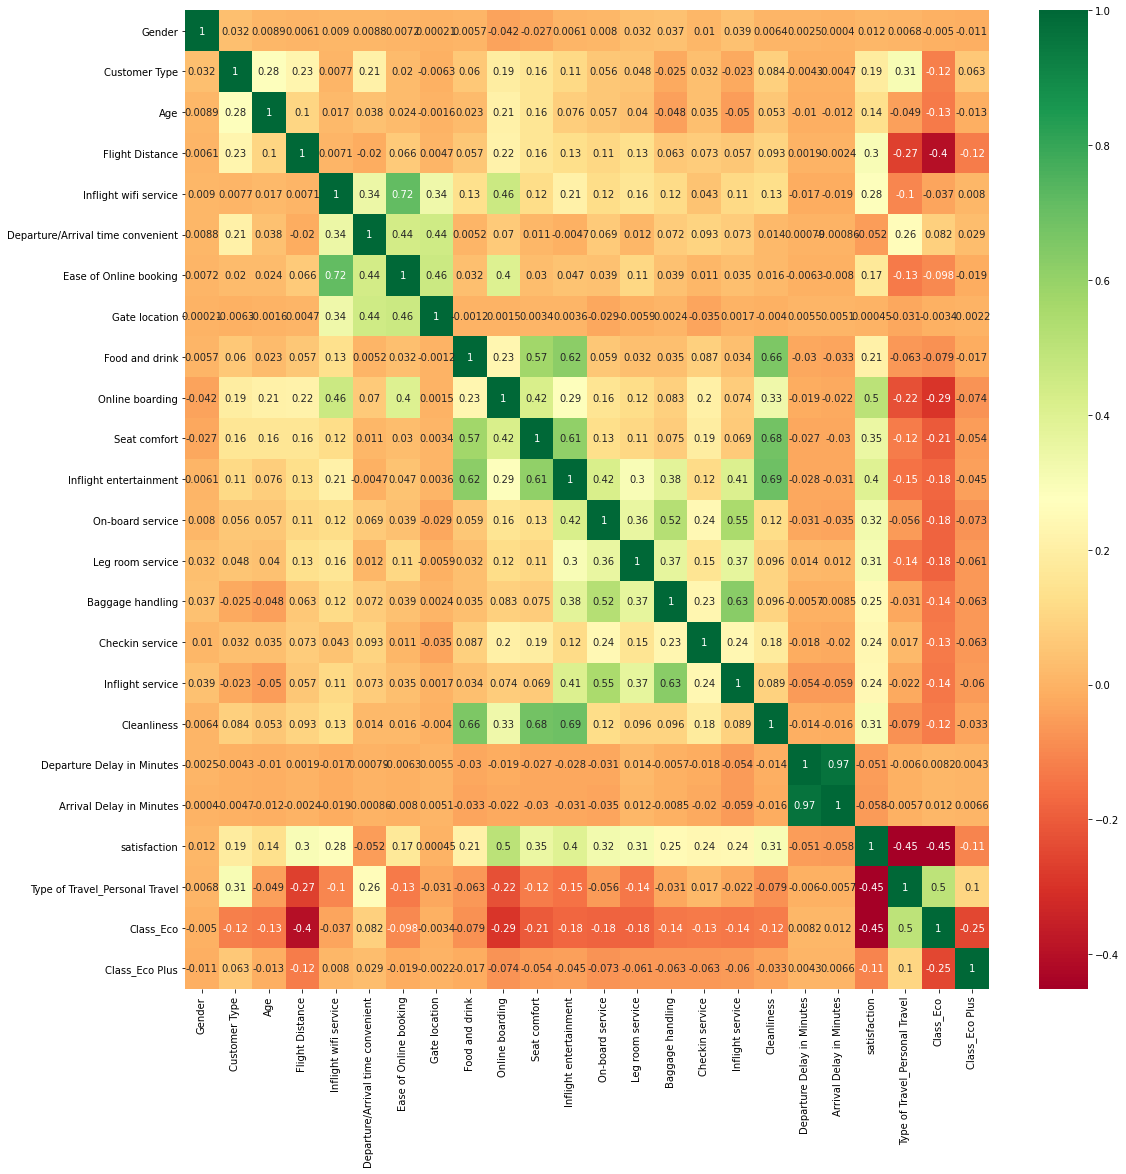

In [37]:
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [39]:
x_train = train.drop(["satisfaction"],axis=1)
y_train = train['satisfaction']

In [40]:
x_test = test.drop(["satisfaction"],axis=1)
y_test = test["satisfaction"]


In [41]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [43]:
xgb.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:49:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
pred = xgb.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [46]:
accuracy_score(y_test,pred)

0.9635808905881899

In [47]:
confusion_matrix(y_test,pred)

array([[14206,   322],
       [  621, 10744]])

In [48]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()

In [49]:
reg_rf.fit(x_train,y_train)
#reg_rf.score(y_test,x_test)

RandomForestClassifier()

In [50]:
rf_pred = reg_rf.predict(x_test)

In [51]:
accuracy_score(y_test,rf_pred)

0.961997451048546